## Exploratory Data Analysis for Bacteria Antibiotics Resistance

The goal of this notebook is to explore data to determine precisely our objectives of prediction on the cleaned dataset, to find some interesting features to engineer.

## Library importation

In [2]:
# install requirements if not already installed
import subprocess
import sys
import importlib.util

def install_and_import(package):
    """Checks if a package is installed, installs it if not."""
    if importlib.util.find_spec(package) is None:
        print(f"Package '{package}' is not installed. Installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    else:
        print(f"Package '{package}' already installed.")

# Necessary packages list
required_packages = [
    "pandas",
    "seaborn",
    "plotly",
    "numpy",
    "matplotlib",
    "pathlib"
]

# Checking and installing packages
for package in required_packages:
    install_and_import(package)

Package 'pandas' already installed.
Package 'seaborn' already installed.
Package 'plotly' already installed.
Package 'numpy' already installed.
Package 'matplotlib' already installed.
Package 'pathlib' already installed.


In [3]:
# Data Vizualization Librairies 
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 

In [4]:
# Global display settings
from IPython.display import display
# plt.style.use('default')
plt.rcParams["figure.figsize"] = (16, 8)

## Errors handling

In [5]:
class StopExecution(Exception):
    def _render_traceback_(self):
        return []

## Data Importation

In [6]:
CLEAN_DATASET_PATH = Path("./data/cleaned_bacteria_dataset.csv")

if not CLEAN_DATASET_PATH.exists():
    print("Could not find the dataset at path:", CLEAN_DATASET_PATH)
    raise StopExecution

try:
    CLEAN_BACTERIA_RESISTANCE_DF = pd.read_csv(CLEAN_DATASET_PATH)
except Exception:
    raise StopExecution(
        f"""Something went wrong while loading the dataset.
You probably made a mistake while generating the dataset file on your machine:
{CLEAN_DATASET_PATH.resolve()}"""
    )

print(f"Dataset loaded successfully with shape: {CLEAN_BACTERIA_RESISTANCE_DF.shape}")
print("Here is a preview of the first 2 lines:")
display(CLEAN_BACTERIA_RESISTANCE_DF.head(2))

Dataset loaded successfully with shape: (9957, 28)
Here is a preview of the first 2 lines:


,id,name,email,address,diabetes,hypertension,hospital_before,infection_freq,amx/amp,amc,...,cip,c,co-trimoxazole,furanes,colistine,collection_date,notes,age,gender,strain
0,S290,Elizabeth Lawrence,elizabeth.lawrence@example.com,"6350 Robinson Loaf Apt. 447, Paulfurt, RI 30252",False,False,False,0.0,R,R,...,S,R,S,S,S,2025-02-05,Patient had fever??,37.0,F,Escherichia coli
1,S291,Tina Sanders,tina.sanders@example.com,"78594 Galloway Port Suite 762, South Tanyatown...",True,False,False,3.0,S,R,...,S,S,S,S,S,2021-05-08,تم العلاج,29.0,F,Morganella morganii


Let's print some basics informations about the dataset like data types, null values

In [7]:
CLEAN_BACTERIA_RESISTANCE_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9957 non-null   object 
 1   name               9957 non-null   object 
 2   email              9957 non-null   object 
 3   address            9957 non-null   object 
 4   diabetes           9947 non-null   object 
 5   hypertension       9947 non-null   object 
 6   hospital_before    9947 non-null   object 
 7   infection_freq     9714 non-null   float64
 8   amx/amp            9957 non-null   object 
 9   amc                9957 non-null   object 
 10  cz                 9957 non-null   object 
 11  fox                9957 non-null   object 
 12  ctx/cro            9957 non-null   object 
 13  ipm                9957 non-null   object 
 14  gen                9957 non-null   object 
 15  an                 9957 non-null   object 
 16  acide_nalidixique  9957 

We see that there are still some missing values and the types are not correctly defined.

In [8]:
missing_matrix = CLEAN_BACTERIA_RESISTANCE_DF.isnull().astype(int)

In [9]:
fig = px.imshow(
    missing_matrix,       
    labels=dict(x="Column", y="Row", color="Missing"),
    x=CLEAN_BACTERIA_RESISTANCE_DF.columns,            
    y=CLEAN_BACTERIA_RESISTANCE_DF.index,           
    color_continuous_scale='Viridis',
    aspect="auto",
    title="Heatmap of Missing Values"
)
fig.show()

We want to plot the boolean columns on the same plot.

In [10]:
bool_cols = ["diabetes", "hospital_before", "hypertension"]
long_df = CLEAN_BACTERIA_RESISTANCE_DF[bool_cols].melt(var_name='variable', value_name='value')
count_df = long_df.groupby(['variable','value']).size().reset_index(name='count')

In [24]:
fig = px.bar(
    count_df,
    x='variable', 
    y='count',    
    color='value',    
    barmode='group', 
    labels={'variable':'Variable', 'count':'Count', 'value':'Presence'},
    title='Comorbidities Distribution'
)
fig.show()

We want to see what strain has each person in the dataset.

In [12]:
nbr_of_strains = CLEAN_BACTERIA_RESISTANCE_DF["strain"].value_counts()
nbr_of_strains = nbr_of_strains.reset_index()

In [13]:
fig = px.pie(
    nbr_of_strains,
    names='strain',    # labels
    values='count',    # sizes
    title='Distribution of Bacterial Strains',
    hole=0.3           # donut chart
)
fig.update_layout(width=1000, height=800)
fig.show()

In [14]:
age_df = CLEAN_BACTERIA_RESISTANCE_DF["age"].value_counts()
age_df = age_df.reset_index()

In [15]:
fig = px.bar(
    age_df,
    x='age',
    y='count',
    title='Distribution of Age'
)
fig.show()

In [17]:
fig = px.histogram(
    CLEAN_BACTERIA_RESISTANCE_DF,
    x='infection_freq',
    labels={'infection_freq': 'Infection Freq'},
    title='Infection Frequency distribution',
)
fig.update_layout(
    xaxis_tickangle=45,
    bargap=0.2
)
fig.show()

Let's check the parity of our dataset:

In [18]:
df_gender = CLEAN_BACTERIA_RESISTANCE_DF["gender"].value_counts()
df_gender = df_gender.reset_index()

In [19]:
fig = px.bar(
    df_gender,
    x='gender', 
    y='count',    
    color='gender',
    labels={'gender':'gender', 'count':'Count'},
    title='Gender repartition'
)
fig.show()

We can now isolate the Antibiotics columns...

In [20]:
ab_cols = [
    'amx/amp', 'amc', 'cz', 'fox', 'ctx/cro', 'ipm', 'gen',
    'an', 'acide_nalidixique', 'ofx', 'cip', 'c',
    'co-trimoxazole', 'furanes', 'colistine'
]

...to compute some statistics about the resistance paterns per antibiotics.

In [21]:
res_counts = pd.DataFrame()

for col in ab_cols:
    res_counts[col] = CLEAN_BACTERIA_RESISTANCE_DF[col].value_counts()

res_counts = res_counts.T[['S', 'R']].reset_index()
res_counts = res_counts.melt(
    id_vars='index',
    value_vars=['S', 'R'],
    var_name='Resistance',
    value_name='Count'
)

fig = px.bar(
    res_counts,
    x='index',
    y='Count',
    color='Resistance',
    barmode='stack',
    color_discrete_map={'S': 'green', 'R': 'red'},
    labels={'index': 'Antibiotic', 'Count': 'Number of Isolates'},
    title='Antibiotic Resistance Patterns (S/R)'
)
fig.update_layout(
    xaxis_tickangle=45,
    bargap=0.2,
    legend_title_text='Resistance'
)
fig.show()

In [23]:
co_occurrence = CLEAN_BACTERIA_RESISTANCE_DF[ab_cols].replace({'R': 1, 'S': 0}).T.dot(
    CLEAN_BACTERIA_RESISTANCE_DF[ab_cols].replace({'R': 1, 'S': 0})
)
fig = px.imshow(
    co_occurrence,
    labels=dict(x="Antibiotic", y="Antibiotic", color="Co-occurrence"),
    x=ab_cols,
    y=ab_cols,
    color_continuous_scale="Blues",
    title="Co-occurrence Matrix of Antibiotic Resistances"
)
fig.update_layout(width=1000, height=800)
fig.show()

C:\Users\angel\AppData\Local\Temp\ipykernel_35244\369484852.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\angel\AppData\Local\Temp\ipykernel_35244\369484852.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



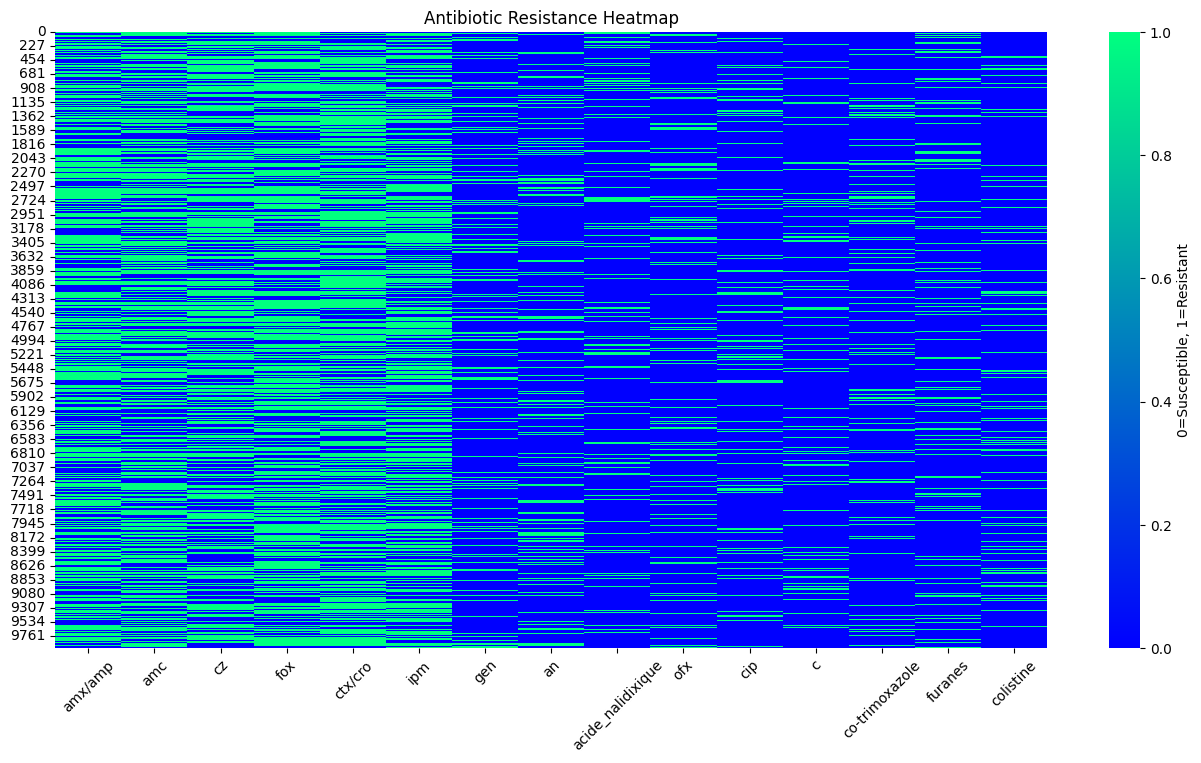

In [317]:
resistance_heatmap_data = CLEAN_BACTERIA_RESISTANCE_DF[ab_cols].map(
    lambda x: 1 if x == 'R' else (0 if x == 'S' else np.nan)
)

plt.figure()
sns.heatmap(
    resistance_heatmap_data,
    cmap='winter',
    cbar_kws={'label': '0=Susceptible, 1=Resistant'}
)
plt.title('Antibiotic Resistance Heatmap')
plt.xticks(rotation=45)
plt.show()

Identification of the Multidrug-Resistant (MDR) strains.

In [26]:
families = {
'Bêta-lactamines': ['amx/amp', 'amc', 'cz', 'fox', 'ctx/cro', 'ipm'],
'Aminosides': ['gen', 'an'],
'Quinolones': ['acide_nalidixique', 'ofx', 'cip'],
'Phénicolés': ['c'],
'Sulfamides': ['co-trimoxazole'],
'Nitrofuranes': ['furanes'],
'Polymyxines': ['colistine']
}
def count_resistant_families(row:pd.Series) -> int:
    """Retourne le nombre de familles avec au moins un antibiotique résistant"""
    resistant_families = 0
    for family, cols in families.items():
        for col in cols:
            val = str(row.get(col, "")).strip().upper()
            if val == "R":  
                resistant_families += 1
                break 
    return resistant_families


resistance_profiles = CLEAN_BACTERIA_RESISTANCE_DF.copy()
resistance_profiles["n_resistant_families"] = resistance_profiles.apply(count_resistant_families, axis=1)

n_families = len(families)

def classify_resistance(row:pd.Series) -> str:
    if row['n_resistant_families'] >= n_families:
        return 'PDR' # Pandrug-resistant
    elif row['n_resistant_families'] >= 5:
        return 'XDR' # Extensively drug-resistant
    elif row['n_resistant_families'] >= 3:
        return 'MDR'
    else:
        return 'Non-MDR'

resistance_profiles['resistance_profile'] = resistance_profiles.apply(classify_resistance, axis=1)

resistance_profiles['resistance_profile'].value_counts()

resistance_profile
Non-MDR    6477
MDR        3206
XDR         272
PDR           2
Name: count, dtype: int64

In [27]:
profile_counts = resistance_profiles['resistance_profile'].value_counts().reset_index()
profile_counts.columns = ['Profile', 'Count']

fig = px.bar(
    profile_counts,
    x='Profile',
    y='Count',
    color='Profile',
    color_discrete_map={'Non-MDR': 'lightblue', 'MDR': 'orange', 'XDR': 'red', 'PDR': 'black'},
    title='Distribution of Antibiotic Resistance Profiles',
    text='Count'
)
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Resistance Profile',
    yaxis_title='Number of Isolates',
    showlegend=False
)
fig.show()

In [330]:
fig = px.pie(
    profile_counts,
    names='Profile',
    values='Count',
    title='Proportion of MDR and XDR Profiles',
    color='Profile',
    color_discrete_map={'Non-MDR': 'lightblue', 'MDR': 'orange', 'XDR': 'red', 'PDR': 'black'},
    hole=0.3
)
fig.update_layout(width=1000, height=800)
fig.show()

In [28]:
profile_by_strain = (
    resistance_profiles
    .groupby(['strain', 'resistance_profile'])
    .size()
    .reset_index(name='Count')
)
profile_by_strain['Total'] = profile_by_strain.groupby('strain')['Count'].transform('sum')
profile_by_strain['Proportion'] = profile_by_strain['Count'] / profile_by_strain['Total']

fig = px.bar(
    profile_by_strain,
    x='strain',
    y='Proportion',
    color='resistance_profile',
    barmode='stack',
    color_discrete_map={'Non-MDR': 'lightblue', 'MDR': 'orange', 'XDR': 'red', 'PDR': 'black'},
    title='Proportion of MDR / XDR Profiles by Bacterial Strain',
    labels={'strain_norm': 'Bacterial Strain', 'Proportion': 'Proportion of Isolates', 'resistance_profile': 'Profile'}
)
fig.update_layout(
    xaxis_tickangle=45,
    yaxis_tickformat=".0%",
    legend_title_text="Resistance Profile"
)
fig.show()

We want to extract info from the address feature because people do not developp the same resitance to antibiotics in hospital than at home, or it can depend on the continent, or your geographic location.

In [29]:
def extract_address_info(address:str) -> pd.Series:
    if pd.isna(address):
        return pd.Series([None, None, None])
    
    parts = [p.strip() for p in address.split(',')]
    city = parts[-2] if len(parts) > 1 else None
    
    # Extraction of state_code, state, zip_code
    state_zip = parts[-1].split() if len(parts) > 0 else []
    state = state_zip[0] if len(state_zip) >= 1 else None
    zip_code = state_zip[1] if len(state_zip) >= 2 else None
    
    return pd.Series([city, state, zip_code])

adresse_df = resistance_profiles.copy()
adresse_df[['city', 'state', 'zip_code']] = (
    adresse_df['address'].apply(extract_address_info)
)

In [30]:
profile_by_state = (
    adresse_df
    .groupby(['state', 'resistance_profile'])
    .size()
    .reset_index(name='Count')
)

fig = px.bar(profile_by_state, 
             x='state', 
             y='Count', 
             color='resistance_profile',
             title='Resistance Profiles by State')
fig.show()

In [31]:
def detect_military_address(addr:str) -> bool:
    if isinstance(addr, str) and any(x in addr for x in ['FPO', 'APO', 'DPO']):
        return 1
    return 0

adresse_df['is_military'] = adresse_df['address'].apply(detect_military_address)

adresse_df[['city', 'state', 'zip_code', 'is_military']].head()

,city,state,zip_code,is_military
0,Paulfurt,RI,30252,0
1,South Tanyatown,HI,30310,0
2,North Benjamin,HI,85195,0
3,Torresmouth,ME,50811,0
4,USNS Neal,FPO,AA,1


In [32]:
# Total by State
profile_by_state['Total'] = profile_by_state.groupby('state')['Count'].transform('sum')

# Proportion
profile_by_state['Rate'] = profile_by_state['Count'] / profile_by_state['Total']

In [33]:
colors = {'MDR': 'Oranges', 'XDR': 'Reds', 'Non-MDR':'Blues', 'PDR': 'Purples'}
for profile in ['Non-MDR', 'MDR', 'XDR', 'PDR']:
    df_profile = profile_by_state[profile_by_state['resistance_profile'] == profile]

    fig = px.choropleth(
        df_profile,
        locations='state',
        locationmode='USA-states',
        color='Rate',
        scope='usa',
        color_continuous_scale=colors[profile],
        title=f'{profile} Rate by US State',
        labels={'Rate': f'Proportion of {profile} isolates'}
    )
    fig.update_layout(width=1000, height=800)
    fig.show()

In [36]:
profile_by_military = (
    adresse_df
    .groupby(['is_military', 'resistance_profile'])
    .size()
    .reset_index(name='Count')
)

profile_by_military['Rate'] = profile_by_military.groupby('is_military')['Count'].transform(lambda x: x/x.sum())

fig = px.bar(
    profile_by_military,
    x='is_military',
    y='Rate',
    color='resistance_profile',
    barmode='stack',
    color_discrete_map={'Non-MDR':'lightblue','MDR':'orange','XDR':'red','PDR':'black'},
    labels={'is_military':'Military Patient','Rate':'Proportion of Isolates'},
    title='Resistance Profiles: Military vs Civilian Patients'
)
fig.update_layout(yaxis_tickformat=".0%")
fig.show()

In [34]:
def get_military_region(row:pd.Series) -> str:
    if row['is_military'] == 1:
        if row['zip_code'] == 'AA':
            return 'Americas'
        elif row['zip_code'] == 'AE':
            return 'Europe / ME / Africa'
        elif row['zip_code'] == 'AP':
            return 'Pacific / Asia'
    return None  # pour les civils

adresse_df['military_region'] = adresse_df.apply(get_military_region, axis=1)

In [35]:
df_plot = (
    adresse_df
    .groupby(['is_military','military_region','resistance_profile'])
    .size()
    .reset_index(name='Count')
)

df_plot['Rate'] = df_plot.groupby(['is_military','military_region'])['Count'].transform(lambda x: x/x.sum())

fig = px.bar(
    df_plot,
    x='military_region',
    y='Rate',
    color='resistance_profile',
    barmode='stack',
    facet_col='is_military',
    color_discrete_map={'Non-MDR':'lightblue','MDR':'orange','XDR':'red'},
    labels={'military_region':' Military Region','Rate':'Proportion of Isolates','resistance_profile':'Profile'},
    title='Resistance Profiles by Civil/Military and Military Region'
)
fig.update_layout(yaxis_tickformat=".0%")
fig.show()